In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [4]:
training = pd.read_csv('data/North_Carolina/train_test_split/training.csv')

In [5]:
training

,Unnamed: 0,County,EXAM_COUNT,EXAMS_3_OR_ABOVE,PERCENT_3_OR_ABOVE,Year,population,per_capita_income,closest_five_r1r2_avg,closest_five_public_avg,...,closest_five_avg_enrollment_r1r2,closest_five_avg_enrollment_public,closest_five_avg_enrollment_private_nfp,closest_five_avg_enrollment_landgrnt,closest_five_avg_enrollment_stem,closest_five_avg_dormrooms_r1r2,closest_five_avg_dormrooms_public,closest_five_avg_dormrooms_private_nfp,closest_five_avg_dormrooms_landgrant,closest_five_avg_dormrooms_stem
0,197,Avery,46.0,17,36.956521739,2020,17848.0,40161.0,138.275109,36.462999,...,24181.8,6126.0,1233.6,23800.2,24181.8,5617.4,1234.2,453.4,6148.2,5617.4
1,160,Onslow,882.0,340,38.5487528,2019,203475.0,44001.0,144.398304,46.460178,...,28576.2,3309.0,2812.8,20040.2,28576.2,7345.4,0.0,858.8,6174.4,7345.4
2,166,Person,138.0,61,44.2028986,2019,38917.0,39585.0,66.549811,37.118504,...,25378.6,5578.6,6216.0,20554.6,25378.6,7509.2,699.2,2425.0,5883.6,7509.2
3,113,Catawba,621.0,287,46.215781,2019,159735.0,45856.0,111.432109,30.925774,...,19252.2,5340.6,2006.0,24885.2,19252.2,4804.0,0.0,1222.0,6909.0,4804.0
4,104,Bladen,45.0,14,31.1111111,2019,29861.0,39145.0,133.958151,39.765632,...,28576.2,3546.2,1254.8,20040.2,28576.2,7345.4,466.6,374.8,6174.4,7345.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,88,Warren,2.0,*,*,2018,19057.0,30339.0,104.617301,51.231222,...,31028.4,3745.2,1542.0,20131.4,31028.4,7634.6,0.0,625.8,6243.2,7634.6
226,212,Clay,4.0,*,*,2020,11142.0,40588.0,122.205382,44.492611,...,32797.6,9144.8,2360.4,22676.4,32623.4,7058.6,1500.0,819.6,5996.8,7794.6
227,204,Cabarrus,1637.0,1068,65.241295052,2020,227214.0,49313.0,91.741941,29.883256,...,22496.4,15354.6,872.0,24885.2,22496.4,6242.6,1207.8,524.6,6909.0,6242.6
228,213,Cleveland,528.0,296,56.060606061,2020,99799.0,40777.0,129.024685,33.206873,...,25475.8,4846.0,2406.8,24107.2,25475.8,5874.8,0.0,835.4,6481.0,5874.8


In [6]:
columns = training.columns[1:]

In [7]:
columns

Index(['County', 'EXAM_COUNT', 'EXAMS_3_OR_ABOVE', 'PERCENT_3_OR_ABOVE',
       'Year', 'population', 'per_capita_income', 'closest_five_r1r2_avg',
       'closest_five_public_avg', 'closest_five_private_notprofit_avg',
       'closest_five_landgrnt_avg', 'closest_five_stem_avg',
       'closest_five_avg_enrollment_r1r2',
       'closest_five_avg_enrollment_public',
       'closest_five_avg_enrollment_private_nfp',
       'closest_five_avg_enrollment_landgrnt',
       'closest_five_avg_enrollment_stem', 'closest_five_avg_dormrooms_r1r2',
       'closest_five_avg_dormrooms_public',
       'closest_five_avg_dormrooms_private_nfp',
       'closest_five_avg_dormrooms_landgrant',
       'closest_five_avg_dormrooms_stem'],
      dtype='object')

In [8]:
training = training[columns]

In [9]:
features = list(training.columns[5:])
features

['population',
 'per_capita_income',
 'closest_five_r1r2_avg',
 'closest_five_public_avg',
 'closest_five_private_notprofit_avg',
 'closest_five_landgrnt_avg',
 'closest_five_stem_avg',
 'closest_five_avg_enrollment_r1r2',
 'closest_five_avg_enrollment_public',
 'closest_five_avg_enrollment_private_nfp',
 'closest_five_avg_enrollment_landgrnt',
 'closest_five_avg_enrollment_stem',
 'closest_five_avg_dormrooms_r1r2',
 'closest_five_avg_dormrooms_public',
 'closest_five_avg_dormrooms_private_nfp',
 'closest_five_avg_dormrooms_landgrant',
 'closest_five_avg_dormrooms_stem']

In [10]:
from sklearn.model_selection import train_test_split
train, validation = train_test_split(training, test_size = 0.2, random_state = 226)

### statistical analysis with statsmodels

In [11]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [12]:
x_train = training.drop(['County','EXAM_COUNT','EXAMS_3_OR_ABOVE','PERCENT_3_OR_ABOVE','Year'],axis=1)
y_train = training[['PERCENT_3_OR_ABOVE']]
X_train = sm.add_constant(x_train)
unimetric_train = X_train.drop(['population','per_capita_income'],axis=1)
X_train

,const,population,per_capita_income,closest_five_r1r2_avg,closest_five_public_avg,closest_five_private_notprofit_avg,closest_five_landgrnt_avg,closest_five_stem_avg,closest_five_avg_enrollment_r1r2,closest_five_avg_enrollment_public,closest_five_avg_enrollment_private_nfp,closest_five_avg_enrollment_landgrnt,closest_five_avg_enrollment_stem,closest_five_avg_dormrooms_r1r2,closest_five_avg_dormrooms_public,closest_five_avg_dormrooms_private_nfp,closest_five_avg_dormrooms_landgrant,closest_five_avg_dormrooms_stem
0,1.0,17848.0,40161.0,138.275109,36.462999,39.041814,198.698709,138.275109,24181.8,6126.0,1233.6,23800.2,24181.8,5617.4,1234.2,453.4,6148.2,5617.4
1,1.0,203475.0,44001.0,144.398304,46.460178,121.373091,286.205289,144.398304,28576.2,3309.0,2812.8,20040.2,28576.2,7345.4,0.0,858.8,6174.4,7345.4
2,1.0,38917.0,39585.0,66.549811,37.118504,55.019170,161.703037,66.549811,25378.6,5578.6,6216.0,20554.6,25378.6,7509.2,699.2,2425.0,5883.6,7509.2
3,1.0,159735.0,45856.0,111.432109,30.925774,42.670440,196.436725,111.432109,19252.2,5340.6,2006.0,24885.2,19252.2,4804.0,0.0,1222.0,6909.0,4804.0
4,1.0,29861.0,39145.0,133.958151,39.765632,68.262014,242.973117,133.958151,28576.2,3546.2,1254.8,20040.2,28576.2,7345.4,466.6,374.8,6174.4,7345.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,1.0,19057.0,30339.0,104.617301,51.231222,58.816501,174.321140,104.617301,31028.4,3745.2,1542.0,20131.4,31028.4,7634.6,0.0,625.8,6243.2,7634.6
226,1.0,11142.0,40588.0,122.205382,44.492611,53.484781,172.394221,125.120451,32797.6,9144.8,2360.4,22676.4,32623.4,7058.6,1500.0,819.6,5996.8,7794.6
227,1.0,227214.0,49313.0,91.741941,29.883256,24.596159,183.714823,91.741941,22496.4,15354.6,872.0,24885.2,22496.4,6242.6,1207.8,524.6,6909.0,6242.6
228,1.0,99799.0,40777.0,129.024685,33.206873,39.224774,197.321227,129.024685,25475.8,4846.0,2406.8,24107.2,25475.8,5874.8,0.0,835.4,6481.0,5874.8


In [13]:
y_train = y_train.apply(pd.to_numeric, errors='coerce')
X_train = X_train.apply(pd.to_numeric, errors='coerce')
unimetric_train = X_train.apply(pd.to_numeric, errors='coerce')

In [14]:
print(unimetric_train.isna().sum())

const                                      0
population                                 4
per_capita_income                          4
closest_five_r1r2_avg                      4
closest_five_public_avg                    4
closest_five_private_notprofit_avg         4
closest_five_landgrnt_avg                  4
closest_five_stem_avg                      4
closest_five_avg_enrollment_r1r2           4
closest_five_avg_enrollment_public         4
closest_five_avg_enrollment_private_nfp    4
closest_five_avg_enrollment_landgrnt       4
closest_five_avg_enrollment_stem           4
closest_five_avg_dormrooms_r1r2            4
closest_five_avg_dormrooms_public          4
closest_five_avg_dormrooms_private_nfp     4
closest_five_avg_dormrooms_landgrant       4
closest_five_avg_dormrooms_stem            4
dtype: int64


In [15]:
print(np.isinf(unimetric_train).sum())

const                                      0
population                                 0
per_capita_income                          0
closest_five_r1r2_avg                      0
closest_five_public_avg                    0
closest_five_private_notprofit_avg         0
closest_five_landgrnt_avg                  0
closest_five_stem_avg                      0
closest_five_avg_enrollment_r1r2           0
closest_five_avg_enrollment_public         0
closest_five_avg_enrollment_private_nfp    0
closest_five_avg_enrollment_landgrnt       0
closest_five_avg_enrollment_stem           0
closest_five_avg_dormrooms_r1r2            0
closest_five_avg_dormrooms_public          0
closest_five_avg_dormrooms_private_nfp     0
closest_five_avg_dormrooms_landgrant       0
closest_five_avg_dormrooms_stem            0
dtype: int64


In [16]:
y_train = y_train.fillna(0)  # or use another strategy like mean, median, etc.
X_train = X_train.fillna(0)  # or use another strategy like mean, median, etc.
unimetric_train = unimetric_train.fillna(0)  # or use another strategy like mean, median, etc.

In [17]:
training['PERCENT_3_OR_ABOVE'] = pd.to_numeric(training['PERCENT_3_OR_ABOVE'], errors='coerce')

C:\Users\amahapatra\AppData\Local\Temp\ipykernel_31620\66272972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training['PERCENT_3_OR_ABOVE'] = pd.to_numeric(training['PERCENT_3_OR_ABOVE'], errors='coerce')


In [18]:
nonuni_model = smf.ols('PERCENT_3_OR_ABOVE ~ per_capita_income + population', data=training).fit()

In [19]:
unidistance_model = smf.ols('PERCENT_3_OR_ABOVE ~ closest_five_r1r2_avg + closest_five_public_avg + closest_five_private_notprofit_avg + closest_five_landgrnt_avg + closest_five_stem_avg', data = training).fit()

In [20]:

full_model = sm.OLS(y_train,X_train).fit()
unimetric_model = sm.OLS(y_train,unimetric_train).fit()
nonuni_model = smf.ols('PERCENT_3_OR_ABOVE ~ per_capita_income + population', data=training).fit()
unidistance_model = smf.ols('PERCENT_3_OR_ABOVE ~ closest_five_r1r2_avg + closest_five_public_avg + closest_five_private_notprofit_avg + closest_five_landgrnt_avg + closest_five_stem_avg', data = training).fit()
pci_model=smf.ols('PERCENT_3_OR_ABOVE ~ per_capita_income', data =training).fit()

In [21]:
f_test_nonuni = full_model.compare_f_test(nonuni_model)
f_test_unimetric = full_model.compare_f_test(unimetric_model)
f_test_unidistance = unimetric_model.compare_f_test(unidistance_model)
print("p-value of full compared to non-university metric model:", f_test_nonuni[1])
print("p-value of full compared to university metric model:", f_test_unimetric[1])
print("p-value of university metric compared to university distance model:", f_test_unidistance[1])

p-value of full compared to non-university metric model: nan
p-value of full compared to university metric model: nan
p-value of university metric compared to university distance model: nan


C:\Users\amahapatra\.conda\envs\am-env\Lib\site-packages\statsmodels\regression\linear_model.py:2284: RuntimeWarning: invalid value encountered in scalar divide
  f_value = (ssr_restr - ssr_full) / df_diff / ssr_full * df_full


In [22]:
print(y_train.dtypes)
print(X_train.dtypes)

PERCENT_3_OR_ABOVE    float64
dtype: object
const                                      float64
population                                 float64
per_capita_income                          float64
closest_five_r1r2_avg                      float64
closest_five_public_avg                    float64
closest_five_private_notprofit_avg         float64
closest_five_landgrnt_avg                  float64
closest_five_stem_avg                      float64
closest_five_avg_enrollment_r1r2           float64
closest_five_avg_enrollment_public         float64
closest_five_avg_enrollment_private_nfp    float64
closest_five_avg_enrollment_landgrnt       float64
closest_five_avg_enrollment_stem           float64
closest_five_avg_dormrooms_r1r2            float64
closest_five_avg_dormrooms_public          float64
closest_five_avg_dormrooms_private_nfp     float64
closest_five_avg_dormrooms_landgrant       float64
closest_five_avg_dormrooms_stem            float64
dtype: object


In [23]:
print(y_train.shape)
print(X_train.shape)

(230, 1)
(230, 18)


In [24]:
full_model = sm.OLS(y_train, X_train).fit()

### models with sklearn

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [26]:
uni_features = list(training.columns[10:])
nonuni_features = list(training.columns[8:10])
features_wo_dormrooms = list(training.columns[8:-5])
coordinates = ['Latitude','Longitude']
features_wo_dormrooms

['closest_five_public_avg',
 'closest_five_private_notprofit_avg',
 'closest_five_landgrnt_avg',
 'closest_five_stem_avg',
 'closest_five_avg_enrollment_r1r2',
 'closest_five_avg_enrollment_public',
 'closest_five_avg_enrollment_private_nfp',
 'closest_five_avg_enrollment_landgrnt',
 'closest_five_avg_enrollment_stem']

In [27]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # You can also use 'median', 'most_frequent', or 'constant'
train[features] = imputer.fit_transform(train[features])

In [28]:
# Replace NaN values with zero
train = train.fillna(0)
# Replace '*' with zero in the entire DataFrame
train = train.replace('*', 0)

In [29]:
fullmodel = LinearRegression()
fullmodel.fit(train[features],train['PERCENT_3_OR_ABOVE'])

LinearRegression()

In [30]:
unimodel = LinearRegression()
unimodel.fit(train[uni_features],train['PERCENT_3_OR_ABOVE'])

LinearRegression()

In [31]:

nonunimodel = LinearRegression()
nonunimodel.fit(train[nonuni_features],train['PERCENT_3_OR_ABOVE'])

LinearRegression()

In [32]:
wodormrooms_model = LinearRegression()
wodormrooms_model.fit(train[features_wo_dormrooms],train['PERCENT_3_OR_ABOVE'])

LinearRegression()

In [33]:
fullmodel.intercept_

np.float64(-61.25659329512811)

In [34]:
fullmodel.coef_

array([-2.54410766e-05,  1.66414841e-03, -1.01977593e+00, -2.13734338e-01,
       -4.40497134e-01,  5.09457068e-01,  9.42324437e-01,  2.25266754e-03,
       -4.84433035e-05, -5.93157814e-04,  6.43301436e-03, -3.44545990e-03,
       -7.36515203e-03,  2.46745621e-03,  2.37787437e-03, -2.58424181e-02,
        1.05964778e-02])

In [35]:
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

In [36]:
# Replace '*' with zero in the entire DataFrame
validation = validation.replace('*', 0)
# Replace NaN values with zero
validation = validation.fillna(0)

In [37]:

print(f"full model rmse:",root_mean_squared_error(fullmodel.predict(validation[features]),validation['PERCENT_3_OR_ABOVE']))
print(f"full model R-squared score:",fullmodel.score(validation[features],validation['PERCENT_3_OR_ABOVE']))

full model rmse: 19.456892990168704
full model R-squared score: 0.27217785968525565


In [38]:
print(f"uni model rmse:",root_mean_squared_error(unimodel.predict(validation[uni_features]),validation['PERCENT_3_OR_ABOVE']))
print(f"uni model R-squared score:",unimodel.score(validation[uni_features],validation['PERCENT_3_OR_ABOVE']))

uni model rmse: 20.46486777828125
uni model R-squared score: 0.1948140871667159


In [39]:
print(f"non uni model rmse:",root_mean_squared_error(nonunimodel.predict(validation[nonuni_features]),validation['PERCENT_3_OR_ABOVE']))
print(f"non uni model R-squared score:",nonunimodel.score(validation[nonuni_features],validation['PERCENT_3_OR_ABOVE']))

non uni model rmse: 20.803386935163427
non uni model R-squared score: 0.16795584193264446


In [40]:
print(f"w/o dormrooms model rmse:",root_mean_squared_error(wodormrooms_model.predict(validation[features_wo_dormrooms]),validation['PERCENT_3_OR_ABOVE']))
print(f"w/o dormrooms model R-squared score:",wodormrooms_model.score(validation[features_wo_dormrooms],validation['PERCENT_3_OR_ABOVE']))

w/o dormrooms model rmse: 22.809795363846767
w/o dormrooms model R-squared score: -0.0002787899821636852


### 5-Fold cross-validation for the four models

In [41]:
## import KFold and kNeighborsRegressor here
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor

In [42]:
num_splits = 5
num_models = 5
kfold = KFold(num_splits,
              random_state = 226,
              shuffle=True)
## This array will hold the mse for each model and split
rmses = np.zeros((num_models, num_splits))

## sets a split counter
i = 0

## loop through the kfold here
for train_index, test_index in kfold.split(training):
    ## cv training set
    northcarolina_train = training.iloc[train_index]

    # Replace '*' with zero in the entire DataFrame
    northcarolina_train = northcarolina_train.replace('*', 0)
    # Replace NaN values with zero
    northcarolina_train = northcarolina_train.fillna(0)
    
    ## cv holdout set
    northcarolina_holdout = training.iloc[test_index]

    # Replace '*' with zero in the entire DataFrame
    northcarolina_holdout = northcarolina_holdout.replace('*', 0)
    # Replace NaN values with zero
    northcarolina_holdout = northcarolina_holdout.fillna(0)
    
    ## "Fit" and get ho mse for the "take the mean and call it a day" model
    baseline_pred = northcarolina_train['PERCENT_3_OR_ABOVE'].mean()*np.ones(len(northcarolina_holdout))
    
    rmses[0, i] = root_mean_squared_error(northcarolina_holdout['PERCENT_3_OR_ABOVE'], baseline_pred)

    ## Fit and get ho mse for full model
    full_lr = LinearRegression()
    
    full_lr.fit(northcarolina_train[features],northcarolina_train['PERCENT_3_OR_ABOVE'])
    
    rmses[1, i] = root_mean_squared_error(northcarolina_holdout['PERCENT_3_OR_ABOVE'], full_lr.predict(northcarolina_holdout[features]))

    ## Fit and get ho mse for nonuni model
    nonuni_lr = LinearRegression()
    
    nonuni_lr.fit(northcarolina_train[nonuni_features],northcarolina_train['PERCENT_3_OR_ABOVE'])
    
    rmses[2, i] = root_mean_squared_error(northcarolina_holdout['PERCENT_3_OR_ABOVE'], nonuni_lr.predict(northcarolina_holdout[nonuni_features]))

    ## Fit and get ho mse for uni model
    uni_lr = LinearRegression()

    uni_lr.fit(northcarolina_train[uni_features],northcarolina_train['PERCENT_3_OR_ABOVE'])
    
    rmses[3, i] = root_mean_squared_error(northcarolina_holdout['PERCENT_3_OR_ABOVE'], uni_lr.predict(northcarolina_holdout[uni_features]))

    ## Fit and get ho mse for no dorm rooms model
    nodorm_lr = LinearRegression()

    nodorm_lr.fit(northcarolina_train[features_wo_dormrooms],northcarolina_train['PERCENT_3_OR_ABOVE'])

    rmses[4, i] = root_mean_squared_error(northcarolina_holdout['PERCENT_3_OR_ABOVE'], nodorm_lr.predict(northcarolina_holdout[features_wo_dormrooms]))
    i=i+1

In [43]:
## Find the avg cv mse for each model here
print(f"Baseline Avg. CV RMSE: {np.mean(rmses[0,:])} and STD: {np.std(rmses[0,:])}")
print(f"fullmodel Avg. CV RMSE: {np.mean(rmses[1,:])} and STD: {np.std(rmses[1,:])}")
print(f"PCA model Avg. CV RMSE: {np.mean(rmses[2,:])} and STD: {np.std(rmses[2,:])}")
print(f"Ridge model Avg. CV RMSE: {np.mean(rmses[3,:])} and STD: {np.std(rmses[3,:])}")

Baseline Avg. CV RMSE: 21.406876701274577 and STD: 1.7602049629571248
fullmodel Avg. CV RMSE: 17.25010564724842 and STD: 2.426628029661312
PCA model Avg. CV RMSE: 21.403214850084563 and STD: 1.7982972180488679
Ridge model Avg. CV RMSE: 20.152461833196185 and STD: 2.4235173884386376


### Full model performs clearly the best. The "no dorm rooms" model is the second best, though uni model is not far behind. While nonuni model lags behind, the difference is still not that big.

In [44]:
# Replace '*' with zero in the entire DataFrame
training = training.replace('*', 0)
# Replace NaN values with zero
training = training.fillna(0)

In [45]:
scaler = StandardScaler()
training_scaled = scaler.fit_transform(training[features])
training_scaled.shape

(230, 17)

In [46]:
pca = PCA(0.95)
training_pca = pca.fit_transform(training_scaled)

In [47]:
training_pca.shape

(230, 8)

In [48]:
pca.explained_variance_ratio_

array([0.32406738, 0.26120819, 0.11184427, 0.08900615, 0.0697586 ,
       0.04925538, 0.02666975, 0.02128443])

### Comparing PCA model and Ridge model and the full model

In [49]:
pca_pipe = Pipeline([('scale', StandardScaler()), ('pca', PCA(0.95)), ('reg', LinearRegression())])
ridge_pipe = Pipeline([('scale', StandardScaler()), ('ridge', Ridge())])

In [50]:
pca_pipe.fit(train[features],train['PERCENT_3_OR_ABOVE'])
ridge_pipe.fit(train[features],train['PERCENT_3_OR_ABOVE'])

Pipeline(steps=[('scale', StandardScaler()), ('ridge', Ridge())])

In [51]:
print(f"pca(0.95) model rmse:",root_mean_squared_error(pca_pipe.predict(validation[features]),validation['PERCENT_3_OR_ABOVE']))
print(f"pca(0.95) model R-squared score:",pca_pipe.score(validation[features],validation['PERCENT_3_OR_ABOVE']))

pca(0.95) model rmse: 17.923381370336305
pca(0.95) model R-squared score: 0.3823845189625844


### Let's compare full model, ridge model and PCA model with 5-fold cross validation.

In [52]:
num_splits = 5
num_models = 4
kfold = KFold(num_splits,
              random_state = 226,
              shuffle=True)
## This array will hold the rmse for each model and split
rmses = np.zeros((num_models, num_splits))
rsquared = np.zeros((num_models, num_splits))

## sets a split counter
i = 0

## loop through the kfold here
for train_index, test_index in kfold.split(training):
    ## cv training set
    northcarolina_train = training.iloc[train_index]
    
    ## cv holdout set
    northcarolina_holdout = training.iloc[test_index]
    
    ## "Fit" and get ho mse for the baseline model
    baseline_pred = northcarolina_train['PERCENT_3_OR_ABOVE'].mean()*np.ones(len(northcarolina_holdout))
    
    rmses[0, i] = root_mean_squared_error(northcarolina_holdout['PERCENT_3_OR_ABOVE'], baseline_pred)
    rsquared[0, i] = r2_score(northcarolina_holdout['PERCENT_3_OR_ABOVE'], baseline_pred)
    
    ## Fit and get ho mse for full model
    full_lr = LinearRegression()
    
    full_lr.fit(northcarolina_train[features],northcarolina_train['PERCENT_3_OR_ABOVE'])
    
    rmses[1, i] = root_mean_squared_error(northcarolina_holdout['PERCENT_3_OR_ABOVE'], full_lr.predict(northcarolina_holdout[features]))
    rsquared[1, i] = full_lr.score(northcarolina_holdout[features],northcarolina_holdout['PERCENT_3_OR_ABOVE'])
    
    ## Fit and get ho mse for PCA model
    pca_pipe = Pipeline([('scale', StandardScaler()), ('pca', PCA(0.95)), ('reg', LinearRegression())])
    
    pca_pipe.fit(northcarolina_train[features],northcarolina_train['PERCENT_3_OR_ABOVE'])
    
    rmses[2, i] = root_mean_squared_error(northcarolina_holdout['PERCENT_3_OR_ABOVE'], pca_pipe.predict(northcarolina_holdout[features]))
    rsquared[2, i] = pca_pipe.score(northcarolina_holdout[features],northcarolina_holdout['PERCENT_3_OR_ABOVE'])
    
    ## Fit and get ho mse for Ridge model
    ridge_pipe = Pipeline([('scale', StandardScaler()), ('ridge', Ridge())])

    ridge_pipe.fit(northcarolina_train[features],northcarolina_train['PERCENT_3_OR_ABOVE'])
    
    rmses[3, i] = root_mean_squared_error(northcarolina_holdout['PERCENT_3_OR_ABOVE'], ridge_pipe.predict(northcarolina_holdout[features]))
    rsquared[3, i] = ridge_pipe.score(northcarolina_holdout[features],northcarolina_holdout['PERCENT_3_OR_ABOVE'])

    i = i+1

In [53]:
## Find the avg cv mse for each model here
print(f"Baseline Avg. CV RMSE: {np.mean(rmses[0,:])} and STD: {np.std(rmses[0,:])}")
print(f"fullmodel Avg. CV RMSE: {np.mean(rmses[1,:])} and STD: {np.std(rmses[1,:])}")
print(f"PCA model Avg. CV RMSE: {np.mean(rmses[2,:])} and STD: {np.std(rmses[2,:])}")
print(f"Ridge model Avg. CV RMSE: {np.mean(rmses[3,:])} and STD: {np.std(rmses[3,:])}")

Baseline Avg. CV RMSE: 21.406876701274577 and STD: 1.7602049629571248
fullmodel Avg. CV RMSE: 17.25010564724842 and STD: 2.426628029661312
PCA model Avg. CV RMSE: 19.364886280624347 and STD: 1.275418800067505
Ridge model Avg. CV RMSE: 17.387105532096875 and STD: 2.260221779391656


In [54]:
## Find the avg cv R-squared score for each model here
print(f"Baseline Avg. CV score: {np.mean(rsquared[0,:])} and STD: {np.std(rsquared[0,:])}")
print(f"fullmodel Avg. CV score: {np.mean(rsquared[1,:])} and STD: {np.std(rsquared[1,:])}")
print(f"PCA model Avg. CV score: {np.mean(rsquared[2,:])} and STD: {np.std(rsquared[2,:])}")
print(f"Ridge model Avg. CV score: {np.mean(rsquared[3,:])} and STD: {np.std(rsquared[3,:])}")

Baseline Avg. CV score: -0.032195723154837805 and STD: 0.04445596242676205
fullmodel Avg. CV score: 0.28923967951913443 and STD: 0.2797717242737477
PCA model Avg. CV score: 0.1367641472096462 and STD: 0.1827746260036255
Ridge model Avg. CV score: 0.2862755174897923 and STD: 0.24856618674741485


### model using xgboost

In [55]:
import xgboost as xgb
xgb.__version__

'2.1.3'

In [56]:
X_train = train[features]
y_train = train['PERCENT_3_OR_ABOVE']
X_test = validation[features]
y_test = validation['PERCENT_3_OR_ABOVE']

In [57]:
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test,y_test,enable_categorical=True)

In [58]:
params = {"objective": "reg:squarederror", "tree_method": "hist"}   ## "hist" uses cpu to compute the model
n = 1000

evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]

xgb_model = xgb.train(
    params=params,
    dtrain=dtrain_reg,
    num_boost_round=n,
    evals=evals,
    verbose_eval=10,            # Print rmse val every 10 rounds
    early_stopping_rounds=100   # XGBoost will automatically stop the training if validation loss doesn't improve for 100 consecutive rounds
)

[0]	train-rmse:16.14761	validation-rmse:18.36610
[10]	train-rmse:3.06993	validation-rmse:10.97642
[20]	train-rmse:1.89973	validation-rmse:10.67681
[30]	train-rmse:1.61122	validation-rmse:10.73102
[40]	train-rmse:1.51407	validation-rmse:10.70336
[50]	train-rmse:1.49279	validation-rmse:10.72444
[60]	train-rmse:1.48666	validation-rmse:10.73725
[70]	train-rmse:1.48307	validation-rmse:10.73484
[80]	train-rmse:1.48213	validation-rmse:10.74079
[90]	train-rmse:1.48177	validation-rmse:10.74431
[100]	train-rmse:1.48166	validation-rmse:10.74587
[110]	train-rmse:1.48164	validation-rmse:10.74619
[119]	train-rmse:1.48162	validation-rmse:10.74657


In [59]:
# Example: New data to predict
X_new = training[features].head(3)  ## just use the old data as a quick example

# Create a DMatrix for the new data
dnew_reg = xgb.DMatrix(X_new, enable_categorical=True)

# Make predictions
y_pred_new = xgb_model.predict(dnew_reg)

print('Predictions for new percentage of AP outcomes that scores 3-5:')
print(y_pred_new)

Predictions for new percentage of AP outcomes that scores 3-5:
[36.965286 38.537746 24.586046]


In [60]:
params = {"objective": "reg:squarederror", "tree_method": "hist"}
n = 1000

results = xgb.cv(
   params, dtrain_reg,
   num_boost_round=n,
   nfold=5,
   early_stopping_rounds=100
)

results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,16.050284,0.388752,17.499782,2.315741
1,12.460931,0.199982,15.517929,2.324512
2,9.797270,0.169260,14.346256,2.384233
3,7.853012,0.203698,13.660541,2.307357
4,6.365237,0.216925,13.250188,2.370512


In [61]:
mean_train_rmse = results['train-rmse-mean'].iloc[-1]  # Final mean train RMSE
std_train_rmse = results['train-rmse-std'].iloc[-1]    # Final std dev train RMSE

mean_val_rmse = results['test-rmse-mean'].iloc[-1]     # Final mean validation RMSE
std_val_rmse = results['test-rmse-std'].iloc[-1]       # Final std dev validation RMSE

# Print results
print(f"Training RMSE: {mean_train_rmse:.4f} +/- {std_train_rmse:.4f}")
print(f"Validation RMSE: {mean_val_rmse:.4f} +/- {std_val_rmse:.4f}")

Training RMSE: 1.2372 +/- 0.5728
Validation RMSE: 12.6326 +/- 2.1479


### SHAP to explain our xgboost model

In [62]:
import shap

In [63]:
#explainer = shap.Explainer(random_forest,X_train)
#shap_values = explainer(X_train)
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

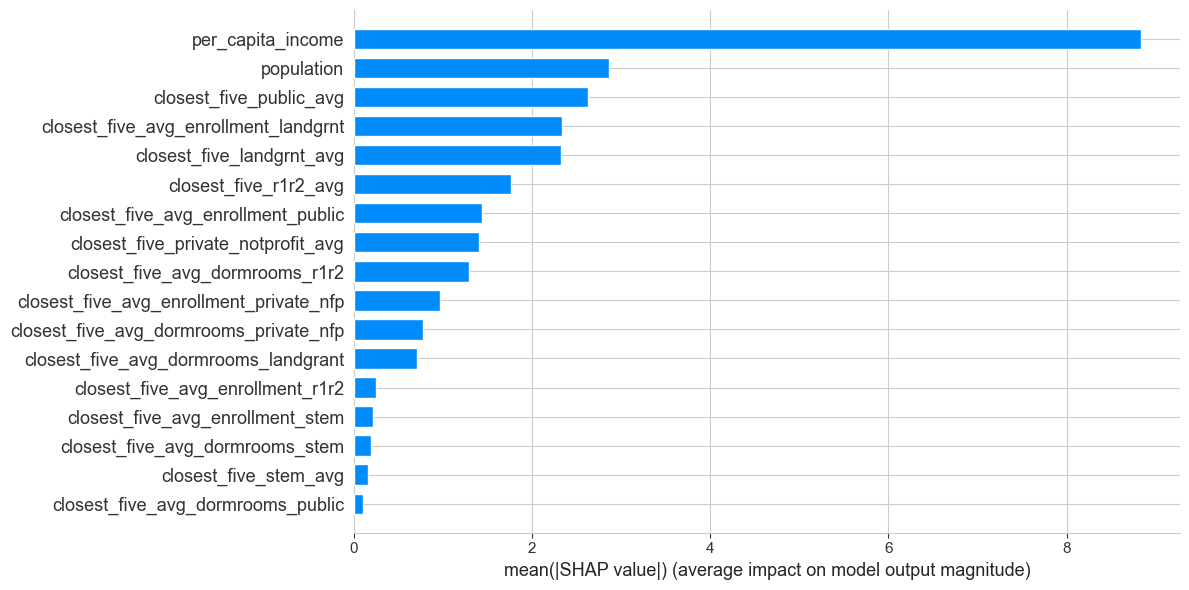

In [64]:
shap.summary_plot(
    shap_values, 
    X_train, 
    plot_type='bar', 
    show=False,
    plot_size=[12, 6]
)
plt.show()
plt.close()

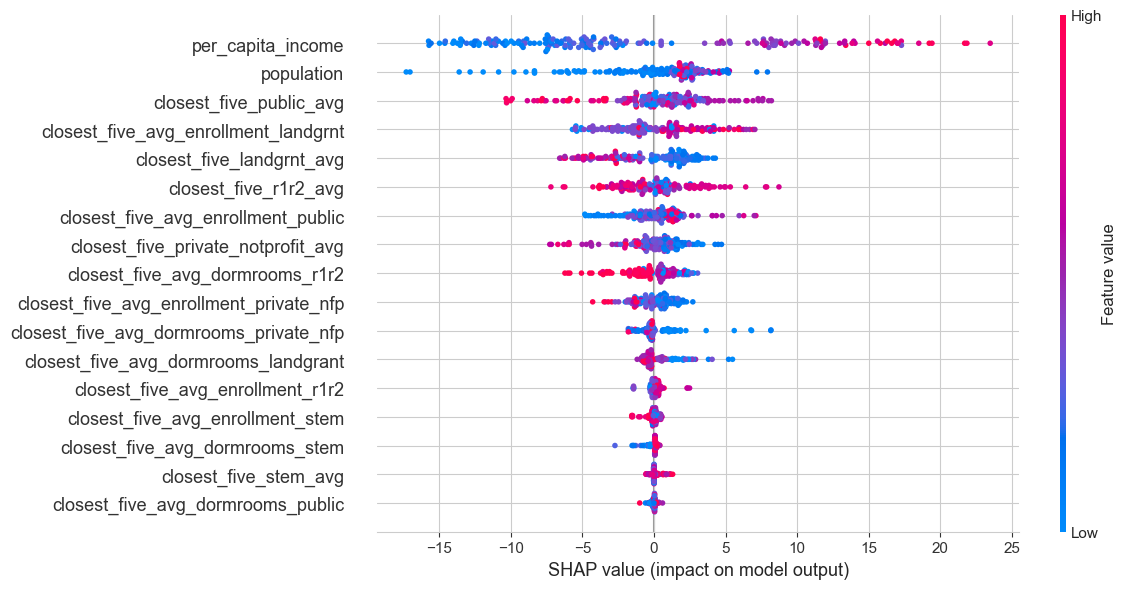

In [65]:
### the scatter plot
shap.summary_plot(shap_values, X_train, show=False, plot_size=[12, 6])
plt.show()
plt.close()